In [1]:
import os
import cv2
import h5py
import numpy
from PIL import Image
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from keras.layers.merge import concatenate, add
from keras.layers import Conv2D, Input, Conv2DTranspose, Activation

In [2]:
def WAZIR_INCEPTION_BLOCK():
  input_image = Input(shape=(None, None, 1), name='INPUT_LR_IMAGE')

  #FIRST LAYER IS USED TO EXTRACT THE FEATURES
  C1 = Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu',name='FIRST_LAYER')(input_image)

  #UPSAMPLING LAYER
  U = Conv2DTranspose(filters=4, kernel_size=(14, 14), strides=(2, 2),padding='same', activation='relu',name='UPSCALE_LAYER')(C1)

  # ****BLOCK1***********
  MAIN_NODE_1 = Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu',name='MAIN_NODE_1')(U)

  Branch1a = Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1),padding='same', activation='relu',name='BRANCH_1a')(MAIN_NODE_1)
  Branch1b = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),padding='same', activation='relu',name='BRANCH_1b')(MAIN_NODE_1)
  Branch1c = Conv2D(filters=16, kernel_size=(5,5), strides=(1, 1),padding='same', activation='relu',name='BRANCH_1c')(MAIN_NODE_1)

  # ****CONCATENATION NODE***********
  Concatenate1 = concatenate(inputs=[Branch1a, Branch1b, Branch1c])
  out1 = Conv2D(filters=1, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu',name='OUTPUT_LAYER_1')(Concatenate1)

  # ****BLOCK2***********
  MAIN_NODE_2 = Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu',name='MAIN_NODE_2')(out1)

  Branch2a = Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1),padding='same', activation='relu',name='BRANCH_2a')(MAIN_NODE_2)
  Branch2b = Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),padding='same', activation='relu',name='BRANCH_2b')(MAIN_NODE_2)
  Branch2c = Conv2D(filters=16, kernel_size=(5,5), strides=(1, 1),padding='same', activation='relu',name='BRANCH_2c')(MAIN_NODE_2)

  # ****CONCATENATION NODE***********
  Concatenate2 = concatenate(inputs=[Branch2a, Branch2b, Branch2c])
  out2 = Conv2D(filters=1, kernel_size=(1, 1), strides=(1, 1), padding='same', activation='relu',name='OUTPUT_LAYER_2')(Concatenate2)
  model = Model(inputs=input_image, outputs=out2)
  return model

In [3]:
model = WAZIR_INCEPTION_BLOCK()

In [4]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 INPUT_LR_IMAGE (InputLayer)    [(None, None, None,  0           []                               
                                 1)]                                                              
                                                                                                  
 FIRST_LAYER (Conv2D)           (None, None, None,   640         ['INPUT_LR_IMAGE[0][0]']         
                                64)                                                               
                                                                                                  
 UPSCALE_LAYER (Conv2DTranspose  (None, None, None,   50180      ['FIRST_LAYER[0][0]']            
 )                              4)                                                            

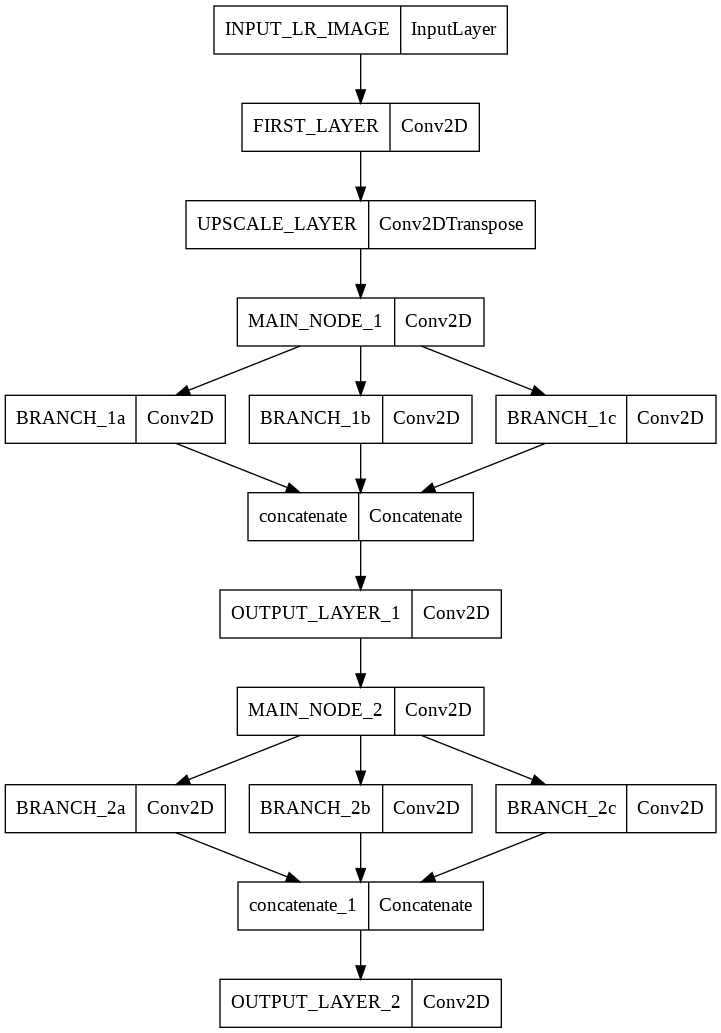

In [5]:
import tensorflow as tf
tf.keras.utils.plot_model(model, 'WAZIR_INCEPTION_BLOCK.png')